In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix,f1_score, precision_score, recall_score
from scikitplot.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")
label_encoder = preprocessing.LabelEncoder()
#Preprocessing
df['Month']= label_encoder.fit_transform(df['Month'])
df['VisitorType']= label_encoder.fit_transform(df['VisitorType'])
df['Weekend']= label_encoder.fit_transform(df['Weekend'])
df['Revenue']= label_encoder.fit_transform(df['Revenue'])

In [3]:
# Creating an instance of SMOTE

X = df.drop("VisitorType", axis=1)
correlation = df.corr()
correlation = correlation['Revenue'].sort_values()
correlation = correlation[correlation > 0.1]
columns = list(correlation.index)[:-1]
# X = df[columns]
X = df[["PageValues","Month","ExitRates"]]
y = df["Revenue"]
smote = SMOTE()
rus = RandomUnderSampler(random_state=42, sampling_strategy = 'majority')

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [4]:
print((y.value_counts()))
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print((y_resampled.value_counts()))

Revenue
0    10422
1     1908
Name: count, dtype: int64
Revenue
0    8367
1    8367
Name: count, dtype: int64


In [5]:
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors=11)
model2 = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train, y_train)
model2.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)
y_pred2 = model2.predict(X_test)

Accuracy score without oversampling: 0.8815896188158961
F1 score without oversampling: 0.6197916666666666
Precision without oversampling: 0.6666666666666666
Recall without oversampling: 0.5790754257907542

Accuracy score with oversampling: 0.8333333333333334
F1 score with oversampling: 0.6089438629876308
Precision with oversampling: 0.5
Recall with oversampling: 0.7785888077858881


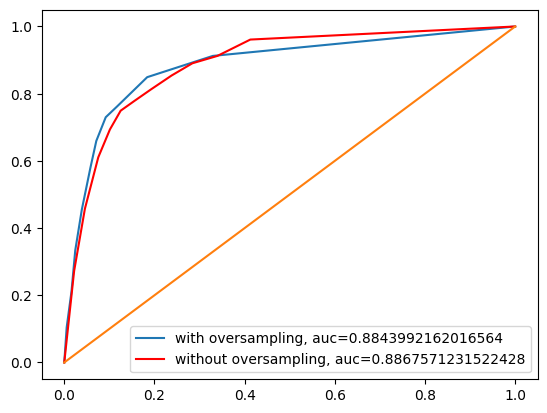

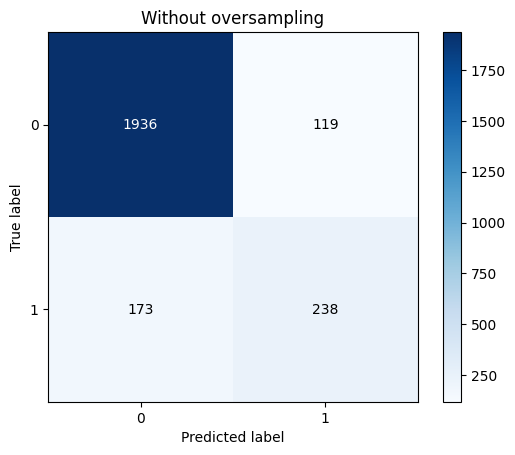

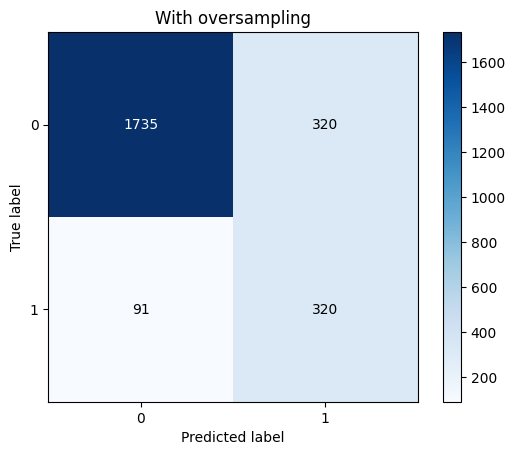

In [6]:
import scikitplot as skplt
import matplotlib.pyplot as plt
y_pred_proba = model.predict_proba(X_test)[::,1]
auc = roc_auc_score(y_test, y_pred_proba)

fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr,label="with oversampling, auc="+str(auc), )
x = [0, 1]
y = [0, 1]


y_pred_proba2 = model2.predict_proba(X_test)[::,1]
auc2 = roc_auc_score(y_test, y_pred_proba2)

fpr, tpr, _ = roc_curve(y_test,  y_pred_proba2)

print("Accuracy score without oversampling:",accuracy_score(y_test, y_pred))
print("F1 score without oversampling:",f1_score(y_test, y_pred))
print("Precision without oversampling:",precision_score(y_test, y_pred))
print("Recall without oversampling:",recall_score(y_test, y_pred))

print()

print("Accuracy score with oversampling:",accuracy_score(y_test, y_pred2))
print("F1 score with oversampling:",f1_score(y_test, y_pred2))
print("Precision with oversampling:",precision_score(y_test, y_pred2))
print("Recall with oversampling:",recall_score(y_test, y_pred2))

plt.plot(fpr,tpr,label="without oversampling, auc="+str(auc2), color='red')
plt.plot(x,y)
plt.legend(loc=4)
plot_confusion_matrix(y_test, y_pred, title="Without oversampling")
plot_confusion_matrix(y_test, y_pred2, title="With oversampling")
plt.show()